In [2]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
g4sfile_name = "data/cpu_net_data_test.hdf5"
g4sfile_name = "/pscratch/sd/k/kbhimani/cpu_net_data/cpu_net_data_test.hdf5"
filename = "data/cpu_net_data_processed_test.hdf5"

In [3]:
g4sfile = h5py.File(g4sfile_name, 'r')
g4sntuple = g4sfile['default_ntuples']['g4sntuple']

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/pscratch/sd/k/kbhimani/cpu_net_data/cpu_net_data_test.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
g4sntuple.keys()

NameError: name 'g4sntuple' is not defined

In [5]:
g4sdf = pd.DataFrame(np.array(g4sntuple['x']['pages']), columns=['x_hit'])
g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['y']['pages']), columns=['y_hit']), lsuffix = '_caller', rsuffix = '_other')
g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['z']['pages']), columns=['z_hit']), lsuffix = '_caller', rsuffix = '_other')
g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['event']['pages']), columns=['event']), lsuffix = '_caller', rsuffix = '_other')
g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['Edep']['pages']), columns=['Edep']), lsuffix = '_caller', rsuffix = '_other')

g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['volID']['pages']), 
                   columns=['volID']), lsuffix = '_caller', rsuffix = '_other')
g4sdf = g4sdf.join(pd.DataFrame(np.array(g4sntuple['iRep']['pages']), 
                   columns=['iRep']), lsuffix = '_caller', rsuffix = '_other')

In [6]:
print(g4sdf)

        x_hit  y_hit  z_hit  event  Edep  volID  iRep
0       170.0    0.0    0.0      0   0.0      0     0
1       170.0    0.0    0.0      1   0.0      0     0
2       170.0    0.0    0.0      2   0.0      0     0
3       170.0    0.0    0.0      3   0.0      0     0
4       170.0    0.0    0.0      4   0.0      0     0
...       ...    ...    ...    ...   ...    ...   ...
130376  170.0    0.0    0.0  99995   0.0      0     0
130377  170.0    0.0    0.0  99996   0.0      0     0
130378  170.0    0.0    0.0  99997   0.0      0     0
130379  170.0    0.0    0.0  99998   0.0      0     0
130380  170.0    0.0    0.0  99999   0.0      0     0

[130381 rows x 7 columns]


In [7]:
detector_hits = g4sdf.loc[(g4sdf.Edep>0)&(g4sdf.volID==1)]
procdf = pd.DataFrame(detector_hits.groupby(['event','volID','iRep'], as_index=False)['Edep'].sum())
procdf = procdf.rename(columns={'iRep':'detID', 'Edep':'energy'})
indexes_of_interest = (procdf['energy'] > 0.01)
procdf = procdf[indexes_of_interest]
event_list= procdf["event"]
event_list = [* set(event_list)]


In [8]:
print(event_list)

[6144, 61442, 65542, 81926, 61448, 88073, 65549, 75789, 86032, 65553, 59410, 57366, 75798, 26, 30750, 59424, 34849, 40993, 73765, 53287, 30774, 51260, 24651, 96332, 10318, 65614, 59473, 12370, 61528, 30814, 57444, 20581, 98407, 45162, 43124, 24703, 51327, 47233, 45186, 82049, 69771, 6284, 45196, 45197, 96397, 51348, 2203, 32924, 12452, 16549, 80037, 30889, 69801, 32943, 78004, 61627, 65733, 63689, 24782, 78031, 75999, 88290, 61673, 55534, 18674, 2296, 98553, 92411, 53500, 39174, 82184, 55569, 90389, 41241, 67866, 55583, 67876, 10533, 59685, 12583, 78116, 90409, 96553, 10540, 31021, 14638, 71985, 24885, 14647, 39224, 65852, 71998, 26948, 14663, 78153, 4431, 29010, 49496, 4442, 88413, 57695, 65890, 6502, 74088, 65898, 94570, 364, 20846, 98672, 16755, 6517, 92535, 63868, 65917, 57727, 20869, 61829, 84361, 67980, 14736, 33169, 63903, 82335, 27043, 59813, 74151, 72105, 90539, 92594, 27061, 47547, 2492, 14788, 45509, 37325, 78286, 90574, 98766, 2515, 6612, 84441, 8669, 72158, 20960, 18914, 4

In [9]:
cut=g4sdf["Edep"]>0&(g4sdf.volID==1)

In [10]:
print(g4sdf[cut])

            x_hit      y_hit       z_hit  event      Edep  volID  iRep
27      21.894889 -15.391691  142.895382     26  0.002625      1     0
29      21.894890 -15.391682  142.895491     26  0.008442      1     0
31      21.896700 -15.379693  142.897527     26  0.014869      1     0
32      21.899088 -15.373450  142.899204     26  0.008410      1     0
33      21.903277 -15.360917  142.891372     26  0.082877      1     0
...           ...        ...         ...    ...       ...    ...   ...
130351  27.172390  21.202113  164.178951  99976  0.017788      1     0
130352  27.173271  21.202374  164.178732  99976  0.013723      1     0
130353  27.173211  21.202283  164.178844  99976  0.010486      1     0
130355  27.173222  21.202355  164.178695  99976  0.006010      1     0
130357  27.172408  21.202061  164.178969  99976  0.005657      1     0

[20304 rows x 7 columns]


In [11]:
print(99733 in set(g4sdf['event']))

True


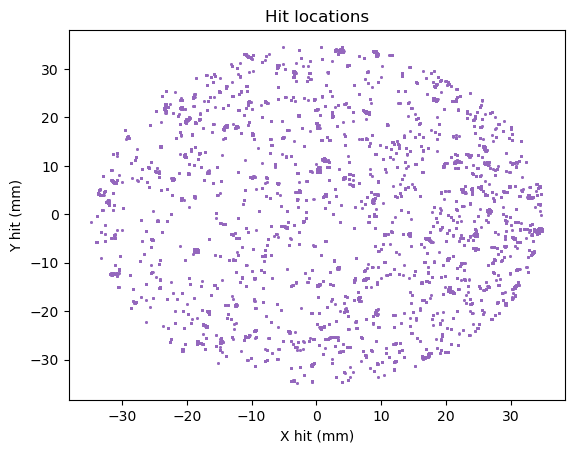

In [12]:
plt.plot(g4sdf['x_hit'][cut], g4sdf['y_hit'][cut], 'o', markersize=1, color='tab:purple')
plt.ylabel('Y hit (mm)')
plt.xlabel('X hit (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title("Hit locations")
plt.show()

In [12]:
x=Counter(g4sdf['event'][cut])

In [13]:
fq=np.array([])
for i in x.keys():
    fq=np.append(fq,x[i])
    if(x[i]>150):
        print(i)

14106
14647
16549
19342
24651
26948
27681
30244
42355
60516
61427
68155
68582
80392
85488
88073
90574
93306
95659


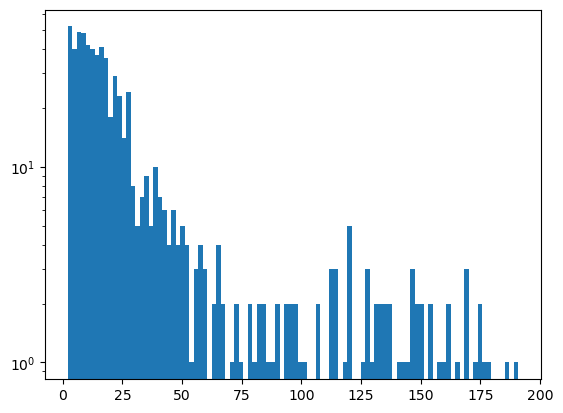

In [14]:
N, bins, patches=plt.hist(fq,bins=100,log='true')

In [13]:
def clust_center(x_val, e_vals):
     return np.sum(x_val*e_vals)/np.sum(e_vals)

In [22]:
def cluster_number(x_val):
    count = 0
    for i in x_val:
            count +=1
    return count

In [14]:
clust_eps = 3 # distance for which two points are considered neighbors in DBSCAN
energy_cut= 1 # only energy above 1 MeV are considered
run_number='0'

In [34]:
print("Running clustering")
model = DBSCAN(eps=clust_eps)
# sim_df = pd.DataFrame(columns = ['x_hit', 'y_hit', 'z_hit','e_hit', 'e_event', 'event'])
sim_df = pd.DataFrame([])
cut= g4sdf["Edep"]>0&(g4sdf.volID==1)
iter=0
for i in event_list:
    if (iter%100==0):
        print("Clustering iteration:", iter, 'of', len(event_list))
    data_load = g4sdf[cut & (g4sdf["event"]==i)]
    e_event=data_load["Edep"].sum()
    data = data_load[['x_hit','y_hit','z_hit']]
    model.fit_predict(data)
    pred = model.fit_predict(data) #sample_weight=normalized_weights
    for lab in set(model.labels_):
        x_clust_temp = clust_center(data_load["x_hit"][model.labels_==lab], data_load["Edep"][model.labels_==lab])
        y_clust_temp = clust_center(data_load["y_hit"][model.labels_==lab], data_load["Edep"][model.labels_==lab])
        z_clust_temp = clust_center(data_load["z_hit"][model.labels_==lab], data_load["Edep"][model.labels_==lab])
        e_clust_temp = data_load["Edep"][model.labels_==lab].sum()
        num_points = cluster_number((data_load["Edep"][model.labels_==lab]))
        df2 = pd.DataFrame([[x_clust_temp, y_clust_temp, z_clust_temp, e_clust_temp,e_event, int(i), num_points]], columns = ['x_hit', 'y_hit', 'z_hit','e_hit', 'e_event', 'event', 'num_points'])
        sim_df=pd.concat([sim_df, df2],ignore_index=True)
    iter+=1

Running clustering
Clustering iteration: 0 of 651
Clustering iteration: 100 of 651
Clustering iteration: 200 of 651
Clustering iteration: 300 of 651
Clustering iteration: 400 of 651
Clustering iteration: 500 of 651
Clustering iteration: 600 of 651


In [35]:
print(sim_df)

         x_hit      y_hit       z_hit     e_hit   e_event  event  num_points
0     1.744239  21.805623  147.771519  0.583188  0.583188   6144          53
1    29.116597  -1.167250  155.051806  0.112014  0.238632  61442           6
2    33.313509  -1.996022  145.395473  0.126618  0.238632  61442          11
3    34.128110  -3.991598  149.260950  0.186406  0.186406  65542           6
4    19.293588 -13.028395  153.506781  0.245873  0.397787  81926          14
..         ...        ...         ...       ...       ...    ...         ...
975 -16.991555  22.773875  146.975574  0.241253  0.515632  96247          21
976 -18.824370  24.856433  149.100467  0.101437  0.515632  96247           6
977 -25.419530  -5.202456  166.068324  0.684428  0.829597  88056          46
978 -19.662149 -13.075657  166.620298  0.145169  0.829597  88056          10
979  27.155701  16.272590  141.056560  0.042164  0.042164  10237           2

[980 rows x 7 columns]


In [33]:
file_save= '/global/homes/k/kbhimani/cpu_net_sims/clust_data/cpu_net_data_clust_' + run_number + '.h5'
print("Saving output to file", file_save)
store = pd.HDFStore(file_save)
store['sim_df'] = sim_df
store.close()

Saving output to file /global/homes/k/kbhimani/cpu_net_sims/clust_data/cpu_net_data_clust_0.h5


In [37]:
store = pd.HDFStore('/global/homes/k/kbhimani/cpu_net_sims/clust_data/cpu_net_data_clust_0.h5')

store['sim_df'] = sim_df  # save it
# store['df']  # load it
store.close()

In [35]:
store['sim_df']  # load it

,x_hit,y_hit,z_hit,e_hit,e_event,event
0,1.744239,21.805623,147.771519,0.583188,0.583188,6144
1,29.116597,-1.167250,155.051806,0.112014,0.238632,61442
2,33.313509,-1.996022,145.395473,0.126618,0.238632,61442
3,34.128110,-3.991598,149.260950,0.186406,0.186406,65542
4,19.293588,-13.028395,153.506781,0.245873,0.397787,81926
...,...,...,...,...,...,...
975,-16.991555,22.773875,146.975574,0.241253,0.515632,96247
976,-18.824370,24.856433,149.100467,0.101437,0.515632,96247
977,-25.419530,-5.202456,166.068324,0.684428,0.829597,88056
978,-19.662149,-13.075657,166.620298,0.145169,0.829597,88056


In [18]:
print(g4sdf["Edep"][g4sdf.volID==1].sum())
print(sim_df["e_hit"].sum())

294.2254200356909
294.1432972796099


In [19]:
test_event=14106

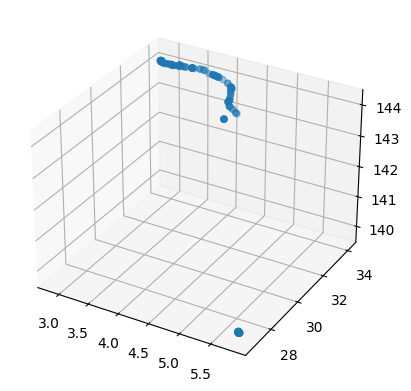

In [20]:
e_dep_clust=g4sdf['Edep'][g4sdf['Edep']>0][g4sdf['event']==test_event]
x_clust=g4sdf['x_hit'][g4sdf['Edep']>0][(g4sdf['event']==test_event)]
y_clust=g4sdf['y_hit'][g4sdf['Edep']>0][g4sdf['event']==test_event]
z_clust=g4sdf['z_hit'][g4sdf['Edep']>0][g4sdf['event']==test_event]
ax = plt.axes(projection='3d')
ax.scatter3D(x_clust, y_clust, z_clust);

In [21]:
data_load = g4sdf[cut & (g4sdf["event"]==test_event)]
data = data_load[['x_hit','y_hit','z_hit']]
model.fit_predict(data)
pred = model.fit_predict(data) #sample_weight=normalized_weights
print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)

number of cluster found: 2
cluster for each point:  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


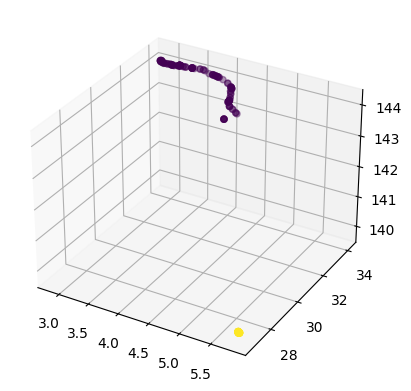

In [22]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_clust, y_clust, z_clust,c=model.labels_);

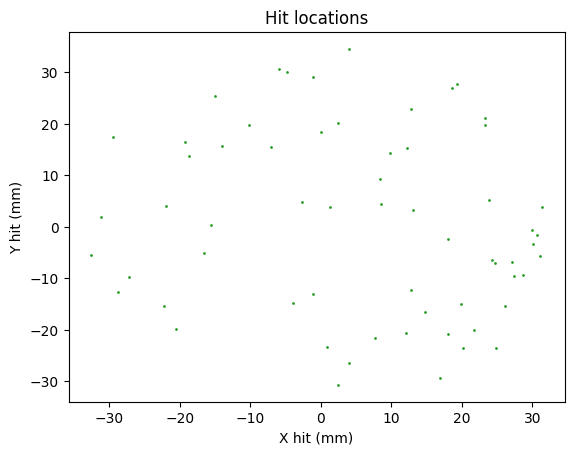

In [28]:
plt.plot(sim_df['x_hit'][cut], sim_df['y_hit'][cut], 'o',markersize=1, color='tab:green')
plt.xlabel('X hit (mm)')
plt.ylabel('Y hit (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title("Hit locations")
plt.show()

In [4]:
f = h5py.File(filename, 'r')
dset = f['/procdf/axis0'][:]
reread = pd.read_hdf(filename)
print(reread)  

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/cpu_net_data_processed_test.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

NameError: name 'reread' is not defined

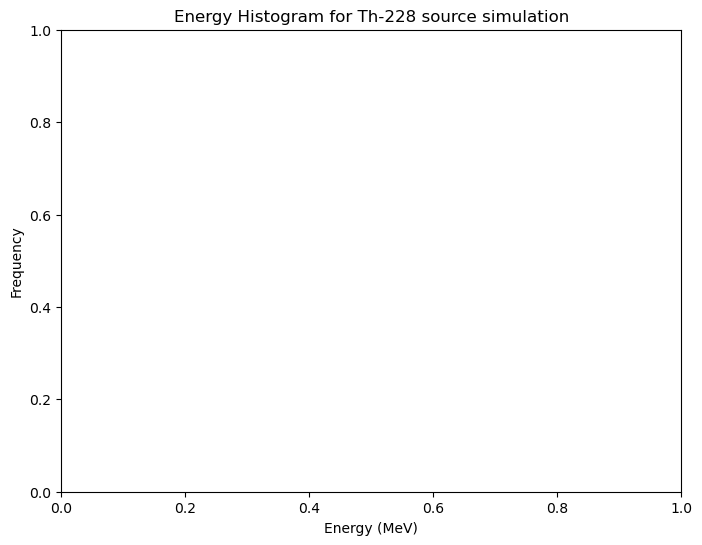

In [5]:
# define window size, output and axes
fig, ax = plt.subplots(figsize=[8,6])

# set plot title
ax.set_title("Energy Histogram for Th-228 source simulation")

# set x-axis name
ax.set_xlabel("Energy (MeV)")

# set y-axis name
ax.set_ylabel("Frequency")

# create histogram within output
N, bins, patches = ax.hist(reread["energy"], bins=500, color="#777777", log=True) #initial color of all bins
#N, bins, patches = ax.hist(reread["energy"][reread["energy"]>0.75], bins=4000, color="#777777") #initial color of all bins

ax.axvline(0.2386, color='purple',linewidth=0.25, linestyle='--', label='Pb 212') 
ax.axvline(0.5107, color='blue',linewidth=0.25, linestyle='--', label='Tl 208')
ax.axvline(0.7273, color='black',linewidth=0.25, linestyle='--', label='Bi 212') 
ax.axvline(1.5925, color='r',linewidth=0.25, linestyle='--', label='Double Escape Peak') 
ax.axvline(2.1035, color='green',linewidth=0.25, linestyle='--', label='Single Escape Peak')
ax.axvline(0.5832, color='blue',linewidth=0.25, linestyle='--', label='Tl 208')
ax.axvline(0.8606, color='blue',linewidth=0.25, linestyle='--', label='Tl 208') 

ax.axvline(2.6145, color='blue',linewidth=0.25, linestyle='--', label='Tl 208') # vertical
plt.legend(['Double Escape Peak','Single Escape Peak','Tl 208'])

# plt.legend(['Pb 212', 'Tl 208', 'Bi 212','Double Escape Peak','Single Escape Peak'])
# fig.savefig('hist.png',format='png')

In [6]:
df =  pd.read_hdf(filename, key="procdf")

bins = np.arange(0, 3000, 1)
plt.figure()
for det, detdf in df.groupby('detID'):
    (detdf["energy"]*1000).hist(bins=bins, histtype="step", label="detector {}".format(det))
plt.xlabel("energy [keV]")
plt.gca().set_xlim(1000, 3000)
plt.gca().set_ylim(0.1, plt.gca().get_ylim()[1])
plt.gca().grid(False)
plt.yscale("log")
plt.legend(frameon=False, loc='upper right')
plt.show()



FileNotFoundError: File data/cpu_net_data_processed_test.hdf5 does not exist

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
# from tools import process_run, process_run_csv
from tools import process_run, process_run_csv
# from prossesing_tools import process_waveform, process_all_waveforms
# procdf = pd.DataFrame(detector_hits.groupby(['event','volID','iRep'], as_index=False)['Edep'].sum())
# procdf = procdf.rename(columns={'iRep':'detID', 'Edep':'energy'})

ModuleNotFoundError: No module named 'tools'